#Fazendo leitura dos dados

In [1]:
!pip install pyspark==3.3.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 31 kB/s 
     |████████████████████████████████| 199 kB 48.2 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=ebd4edf1faeb0b30d1554386dece2abfde7cad3c56313310e57cfee650a5f7a9
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder.master('local[*]').appName("Transformacao com Spark").getOrCreate()

spark

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
dados = spark.read.parquet('/content/drive/MyDrive/Challenge_Data_Science_Alura/dados/dataset_parquet')

In [6]:
dados.show()

+--------------------+-----+---------+---------+-------+------+----+----------+------+--------+--------+------------------+-------------+------------------+--------+-------+----------+------------+-----------------+---------------+------------+----------+----------+--------+
|                  id|andar|area_util|banheiros|quartos|suites|vaga|condominio|  iptu|   valor|Academia|Animais permitidos|Churrasqueira|Condomínio fechado|Elevador|Piscina|Playground|Portaria 24h|Portão eletrônico|Salão de festas|Zona Central|Zona Norte|Zona Oeste|Zona Sul|
+--------------------+-----+---------+---------+-------+------+----+----------+------+--------+--------+------------------+-------------+------------------+--------+-------+----------+------------+-----------------+---------------+------------+----------+----------+--------+
|03a386b6-7ab8-4ef...|    0|     43.0|        1|      2|     0|   1|     285.0|   0.0| 22999.0|       1|                 1|            1|                 1|       0|      0

#Preparação dos dados para os algoritmos do Spark MLlib

In [7]:
from pyspark.ml.feature import VectorAssembler

In [8]:
dados = dados.withColumnRenamed('valor','label')

In [9]:
X = []
for i in dados.columns:
  if i != 'id' and i != 'label':
    X.append(i)
X

['andar',
 'area_util',
 'banheiros',
 'quartos',
 'suites',
 'vaga',
 'condominio',
 'iptu',
 'Academia',
 'Animais permitidos',
 'Churrasqueira',
 'Condomínio fechado',
 'Elevador',
 'Piscina',
 'Playground',
 'Portaria 24h',
 'Portão eletrônico',
 'Salão de festas',
 'Zona Central',
 'Zona Norte',
 'Zona Oeste',
 'Zona Sul']

In [10]:
assembler = VectorAssembler(inputCols = X, outputCol = 'features')

In [11]:
dados_vetorizado = assembler.transform(dados).select('features', 'label')

In [12]:
dados_vetorizado.show(truncate=False)

+-----------------------------------------------------------------------------------------------+--------+
|features                                                                                       |label   |
+-----------------------------------------------------------------------------------------------+--------+
|[0.0,43.0,1.0,2.0,0.0,1.0,285.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0]   |22999.0 |
|(22,[1,2,3,6,19],[44.0,1.0,2.0,170.0,1.0])                                                     |110000.0|
|(22,[0,1,2,3,5,20],[4.0,55.0,1.0,2.0,1.0,1.0])                                                 |115000.0|
|(22,[0,1,2,3,19],[2.0,55.0,1.0,2.0,1.0])                                                       |115000.0|
|(22,[1,2,3,6,7,18],[50.0,1.0,1.0,1300.0,2679.0,1.0])                                           |125000.0|
|(22,[0,1,2,3,5,6,9,10,11,13,15,17,20],[2.0,47.0,1.0,2.0,1.0,380.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])|138000.0|
|(22,[1,2,3,5,6,10,11,13,20],[45.0,1.

#Análise de correlação

In [13]:
from pyspark.ml.stat import Correlation
import pandas as pd

In [14]:
correlacao = Correlation.corr(dados_vetorizado, 'features').collect()[0][0]

In [15]:
correlacao.toArray()

array([[ 1.00000000e+00,  2.06748857e-02,  1.75771533e-02,
         1.00834528e-02,  2.42741138e-02,  1.82718435e-02,
         6.61793025e-03,  3.81095579e-04,  6.41111110e-02,
         1.01639775e-01,  4.57692561e-02,  9.17071035e-02,
         7.19853276e-02,  4.35550202e-02,  5.37283976e-02,
         8.96649707e-02,  8.34316227e-02,  5.86164288e-02,
         3.54157220e-02, -9.34283198e-03,  1.13949699e-02,
        -1.45510872e-02],
       [ 2.06748857e-02,  1.00000000e+00,  6.71030551e-01,
         6.74075597e-01,  6.20128736e-01,  4.71928438e-01,
         4.56765657e-02,  2.13371390e-02,  1.99696761e-03,
        -1.29998185e-02, -2.40512015e-02, -1.26055199e-02,
         1.68407713e-02,  1.81253057e-02, -1.57595387e-02,
        -2.44674623e-02, -2.12857930e-03, -2.69092650e-02,
        -1.03892024e-01, -1.70483530e-01,  1.20950909e-01,
         3.97345272e-02],
       [ 1.75771533e-02,  6.71030551e-01,  1.00000000e+00,
         6.49025360e-01,  7.39838048e-01,  4.45058514e-01,
    

In [16]:
dataframe_correlacao = pd.DataFrame(correlacao.toArray(), columns=X, index=X)

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

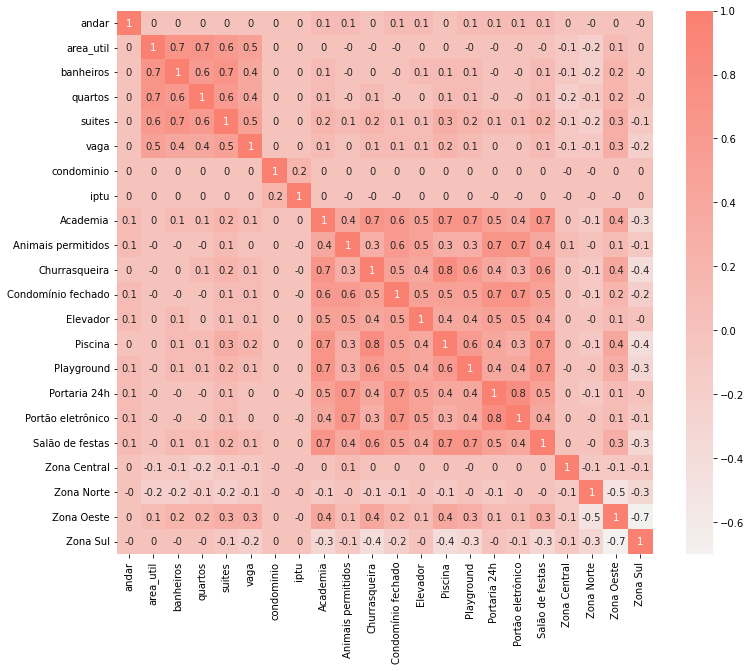

In [18]:
plt.figure(figsize=(12,10))
paleta = sns.color_palette("light:salmon", as_cmap=True)
sns.heatmap(dataframe_correlacao.round(1), annot=True, cmap=paleta)
# Nota-se valores de correlação destacados entre imóveis com portão eletrónico e portaria 24h
# e entre imóveis com churrasqueira e piscina 

#Criação do modelo de regressão linear

In [19]:
from pyspark.ml.regression import LinearRegression

In [20]:
treino, teste = dados_vetorizado.randomSplit([0.7, 0.3], seed=101) # é interessante definir uma seed de aleatoriedade para fazer comparação com resultados de outros testes

In [21]:
treino.count() 

46503

In [22]:
teste.count()

20048

In [23]:
lr = LinearRegression()

In [24]:
modelo_lr = lr.fit(treino)

In [25]:
previsoes_lr_treino = modelo_lr.transform(treino)
previsoes_lr_treino.show()

+--------------------+---------+------------------+
|            features|    label|        prediction|
+--------------------+---------+------------------+
|(22,[0,1,2,3,4,5,...| 580000.0| 458063.6579385373|
|(22,[0,1,2,3,4,5,...|3050000.0|3676731.7076165015|
|(22,[0,1,2,3,4,5,...|1590000.0|1941388.7233345269|
|(22,[0,1,2,3,4,5,...|1600000.0|2885540.4018735304|
|(22,[0,1,2,3,4,5,...| 390000.0|506224.42529405875|
|(22,[0,1,2,3,4,5,...| 917000.0| 704941.7067489898|
|(22,[0,1,2,3,4,5,...|1390000.0| 2349249.911558833|
|(22,[0,1,2,3,4,5,...|1050000.0|1734187.6117884025|
|(22,[0,1,2,3,4,5,...| 550000.0| 794321.2627789831|
|(22,[0,1,2,3,4,5,...|1120000.0|1194176.4256195773|
|(22,[0,1,2,3,4,5,...| 650000.0| 990277.5541047907|
|(22,[0,1,2,3,4,5,...| 640000.0| 603470.7066198833|
|(22,[0,1,2,3,4,5,...|1265000.0|1901812.9531890547|
|(22,[0,1,2,3,4,5,...| 906500.0|1334441.7266111905|
|(22,[0,1,2,3,4,5,...| 365000.0| 421775.1658292267|
|(22,[0,1,2,3,4,5,...| 560000.0|1174965.5253871817|
|(22,[0,1,2,

#Avaliação do modelo de regressão linear

In [26]:
resumo_treino = modelo_lr.summary

In [27]:
"""
R2 (ou **coeficiente de determinação**):
é uma medida estatística que representa a 
porcentagem de variação da variável resposta 
que é explicada pelo modelo de regressão. 
Por se tratar de uma porcentagem, seu valor 
varia de 0 a 1.
"""
resumo_treino.r2 

0.6653410716915263

In [28]:
"""
RMSE (ou Raiz do Erro Quadrático Médio):
é a métrica que calcula a raiz quadrada do erro 
médio entre os valores reais e as predições da 
regressão. Quanto menor esse valor, melhor será 
o modelo, uma vez que estará cometendo menos erros.
"""
resumo_treino.rootMeanSquaredError

853568.3443892412

In [29]:
resumo_teste = modelo_lr.evaluate(teste)

In [30]:
resumo_teste.r2

0.6656150379819897

In [31]:
resumo_teste.rootMeanSquaredError

846075.5795565957

In [32]:
print('Linear Regression')
print("="*30)
print("Dados de Treino")
print("="*30)
print("R²: %f" % resumo_treino.r2)
print("RMSE: %f" % resumo_treino.rootMeanSquaredError)
print("")
print("="*30)
print("Dados de Teste")
print("="*30)
print("R²: %f" % resumo_teste.r2)
print("RMSE: %f" % resumo_teste.rootMeanSquaredError)

Linear Regression
Dados de Treino
R²: 0.665341
RMSE: 853568.344389

Dados de Teste
R²: 0.665615
RMSE: 846075.579557
